<a href="https://colab.research.google.com/github/Dominika26/UMWF/blob/main/Case_1_Smoczynska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as scikit_learn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#Biblioteka do undersamplingu i oversamplingu
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from imblearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC


**Preprocessing (notatka na własne potrzeby)**
- zmiana tekstowych na liczbowe (chyba 2 ostatnie kolumny) - label encoder w uzasadnionych przypadkach
- usuwanie zbędnych znaków itp.
- jeżeli braków jest dużo w wierszu to go usuwamy, a jak kolumna jest w porządku to możemy zrobić średnią - ale jest też uzupełnianie z najbliższych sąsiadów (w klasie preprocessing)
- outliery - najlepiej zrobić boxploty i zobaczyć dla których zmiennych tak jest i jeżeli dla którejś są jakieś bardzo widoczne outliery to tam je pousuwać, ale 1000 to zdecydowanie za dużo do usuwania - tam właśnie widać które odstają, nie można wszystkich wyrzucić (3/4 obserwacje )
- usuwamy kolumny z unikatowymi wartościami (identyfikującymi)
- normalizacja/standaryzacja po uzupełnieniu i usuwaniu outlierów. Przy drzewach decyzyjnych np. nie ma sensu tego robić
- PCA dopiero na końcu robimy, musimy zmniejszyć liczbę kolumn: ale warto na początku sobie zobaczyć korelacje; jak nie ma korelacji z Y to w ogóle bez sensu taka kolumna; PCA ma sens kiedy są ze sobą mocno skorelowane -> tam na wykresie mogę sobie zobaczyć ile nam zmienności tłumaczy jakaś dana liczba zmiennych; może być tak że różnica między 10 a 14 jest już niewielka; tam jest w tej metodzie też jakiś punkt odcięcia; można też wywalić kolumnę jeżeli nie ma zmienności, wariancji

Przy train test split warto użyć stratify=y żeby zapewnić losowość




In [43]:
df = pd.read_csv('case1.csv')

In [44]:
df

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,11,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,31,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Preprocessing**

In [45]:
#Usuwanie zbędnych kolumn
columns_to_drop = ['Index', 'Address']
df = df.drop(columns=columns_to_drop)
df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Zakodowanie zmiennych kategorycznych

In [46]:
print(df['ERC20 most sent token type'].nunique())
print(df['ERC20_most_rec_token_type'].nunique())

#uzupełnienie pustych wartości wartością 'unknown'
df['ERC20 most sent token type'] = df['ERC20 most sent token type'].fillna('unknown')
df['ERC20_most_rec_token_type'] = df['ERC20_most_rec_token_type'].fillna('unknown')

cols = ['ERC20 most sent token type', 'ERC20_most_rec_token_type']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

305
467


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,63,300
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,154,257
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,185,436
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,217,436
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,238,154


Zastąpienie pustych wartości

In [47]:
null_counts = {column: df[column].isnull().sum() for column in df.columns}
null_counts_df = pd.DataFrame.from_dict(null_counts, orient='index', columns=['Liczba pustych wartości'])
# print(null_counts_df)

for column in df.columns:
  df[column] = df[column].fillna(method='pad')

df.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,63,300
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,154,257
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,185,436
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,217,436
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,238,154


Boxploty

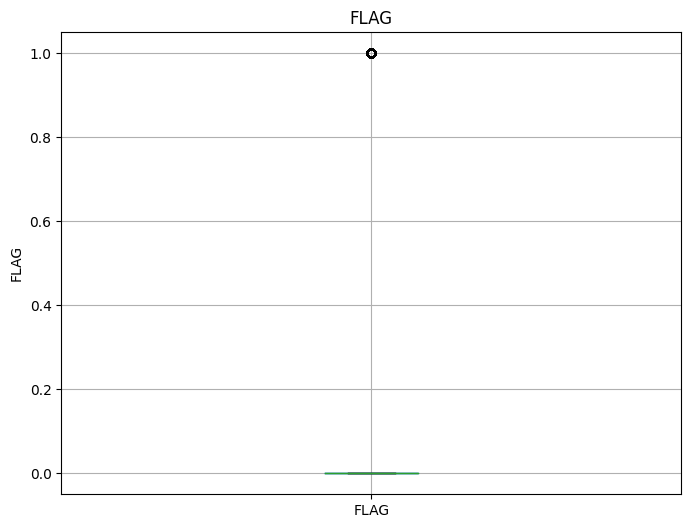

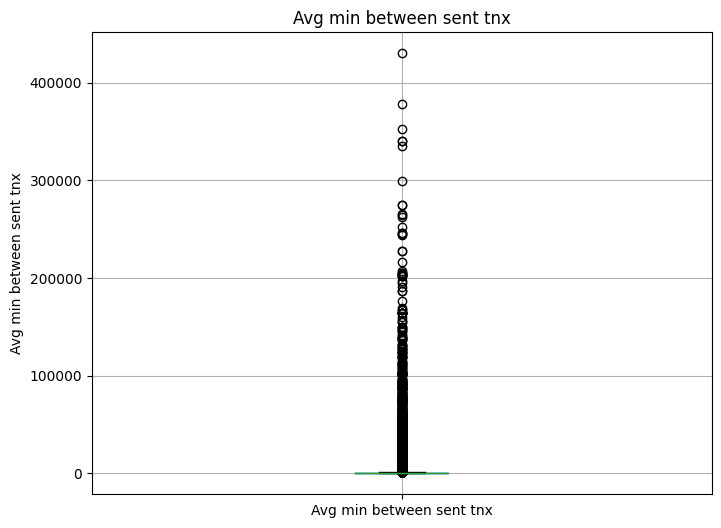

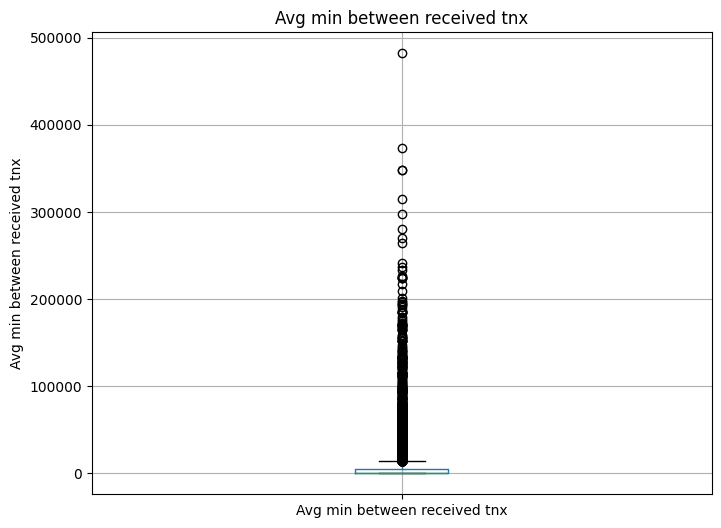

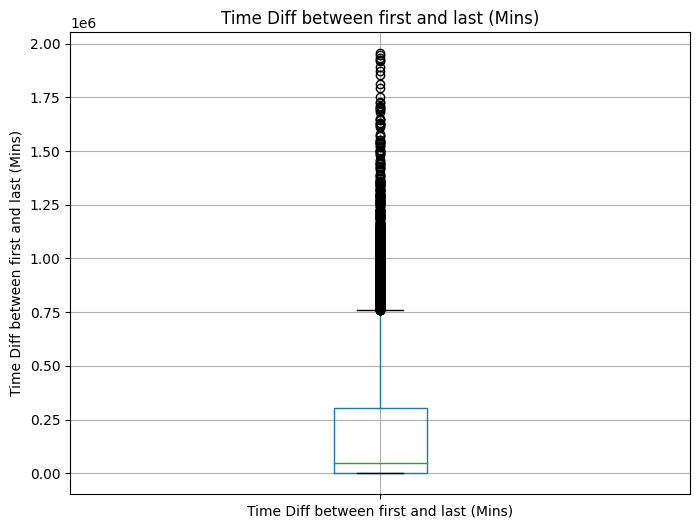

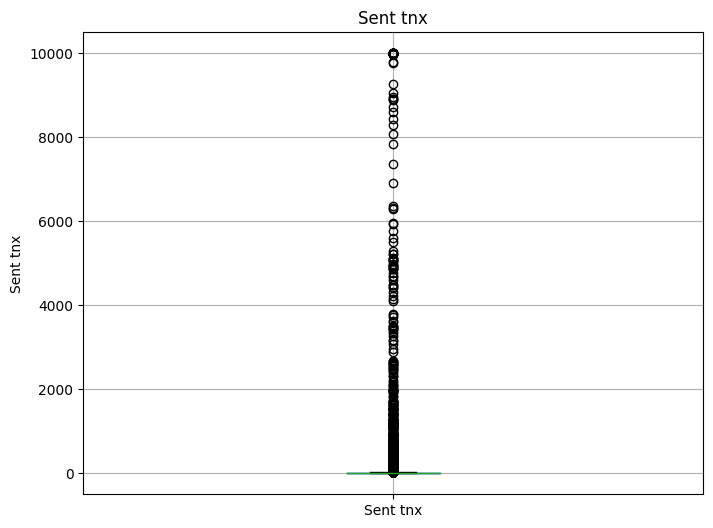

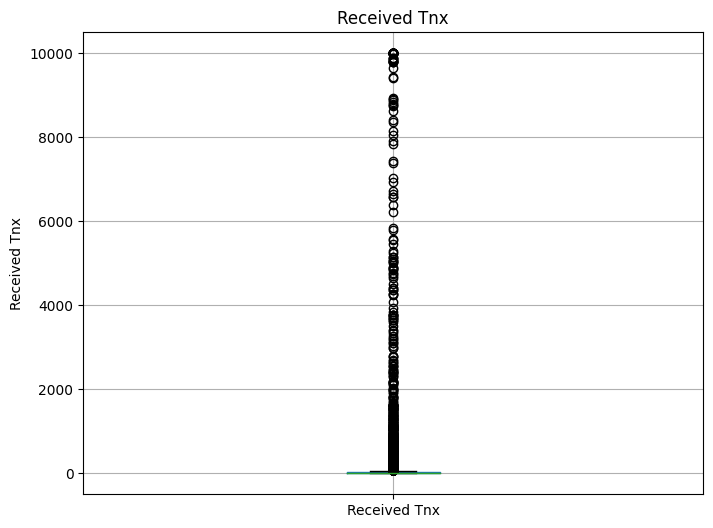

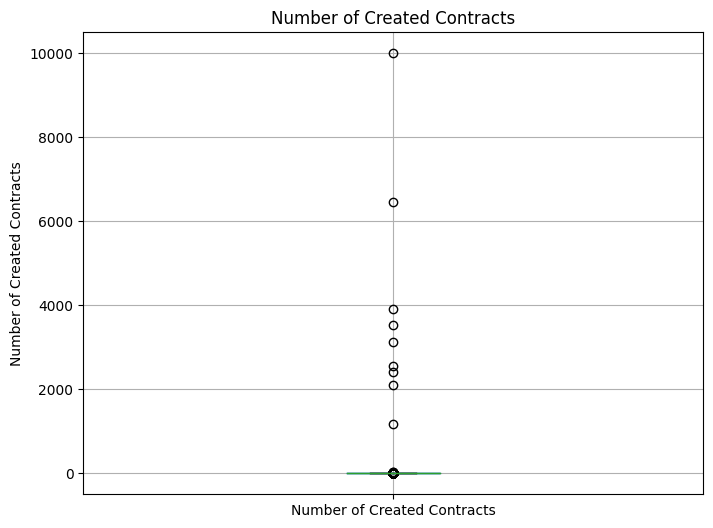

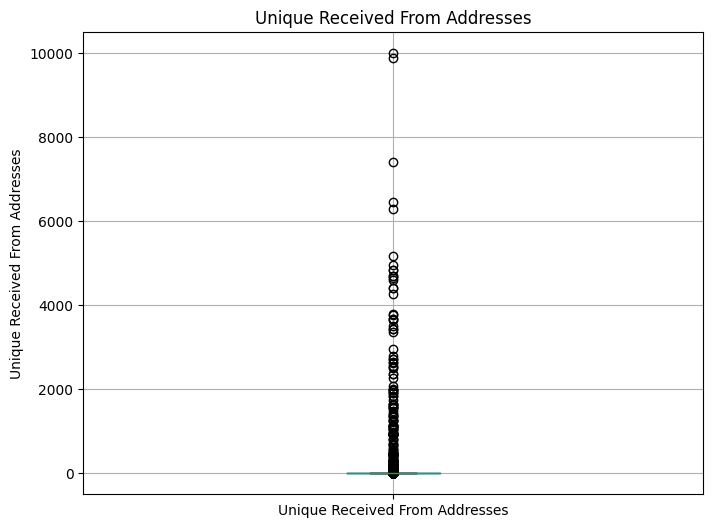

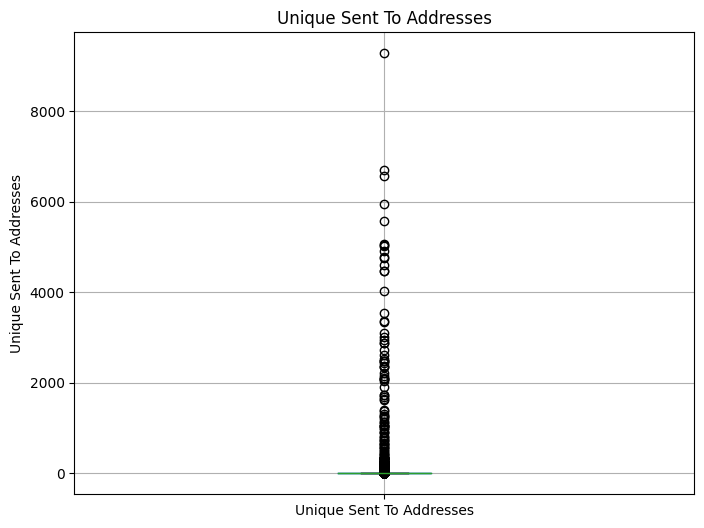

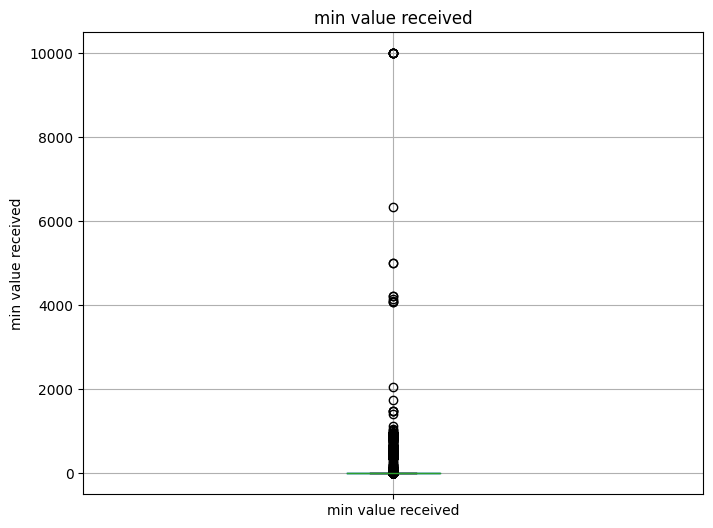

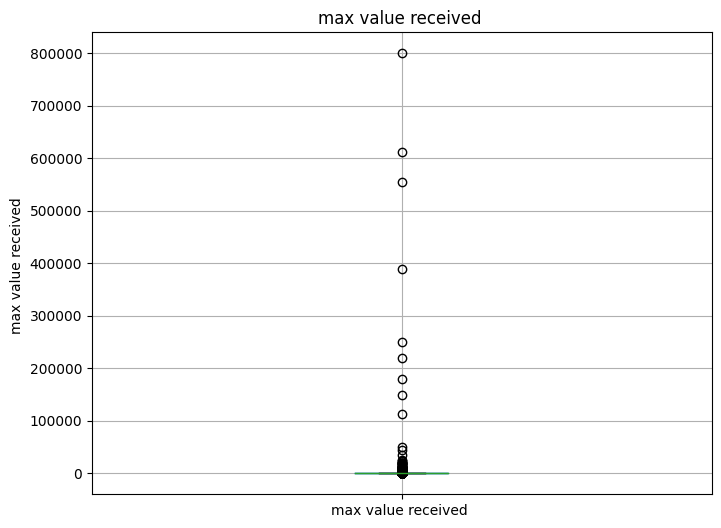

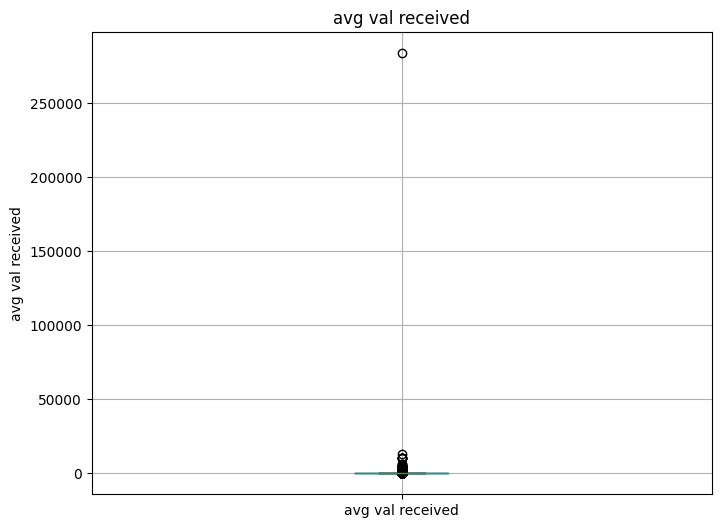

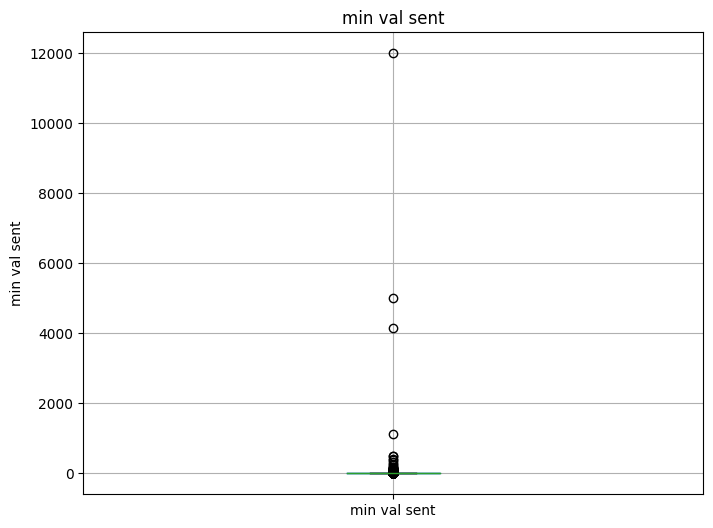

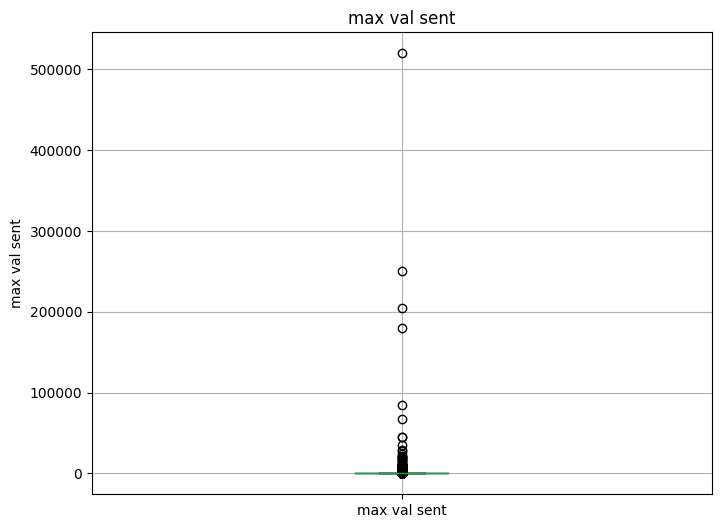

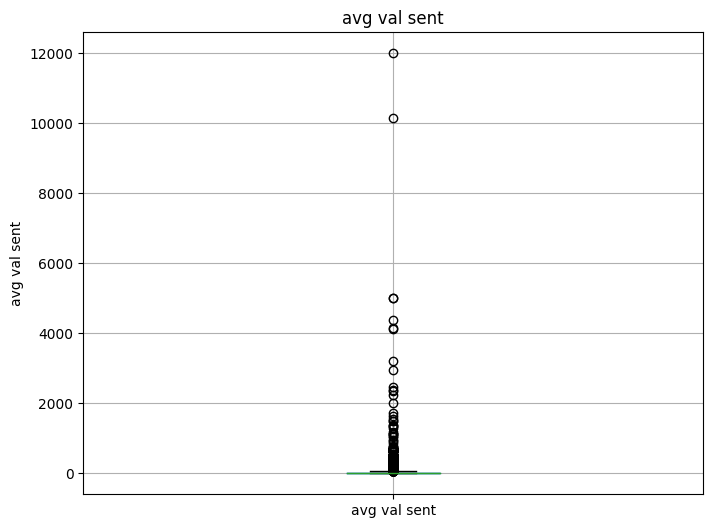

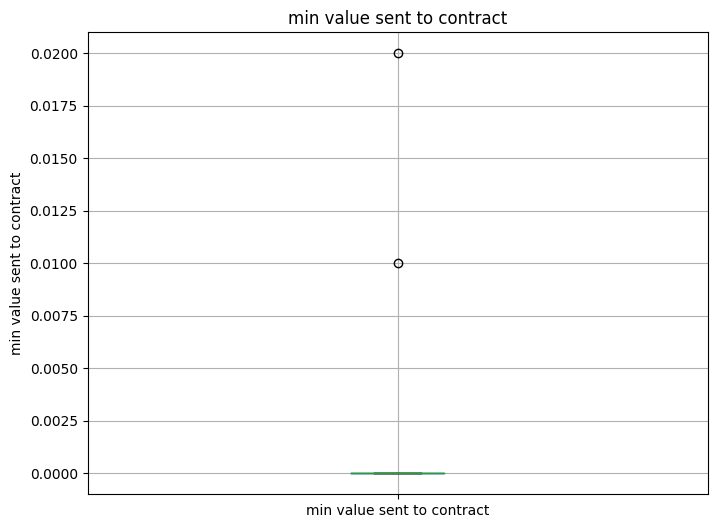

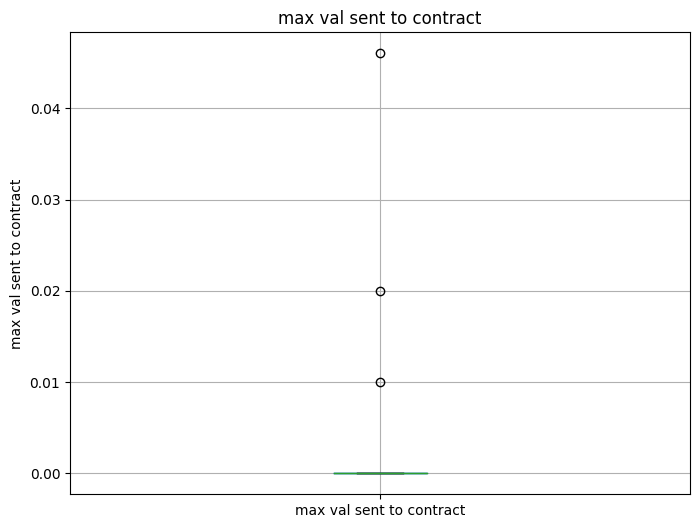

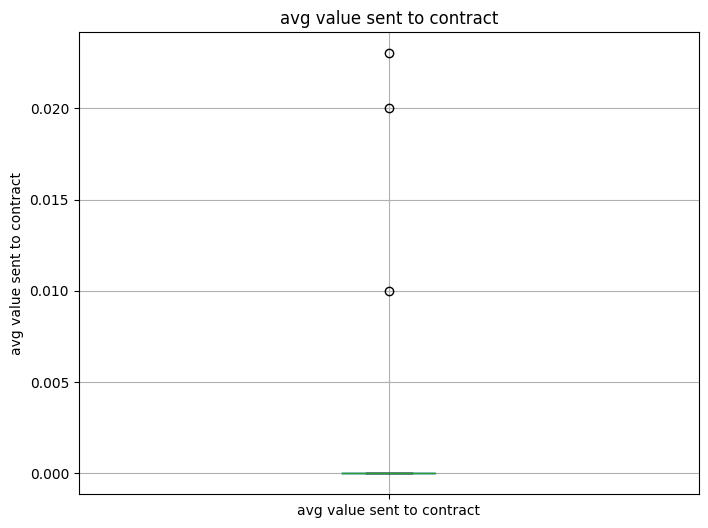

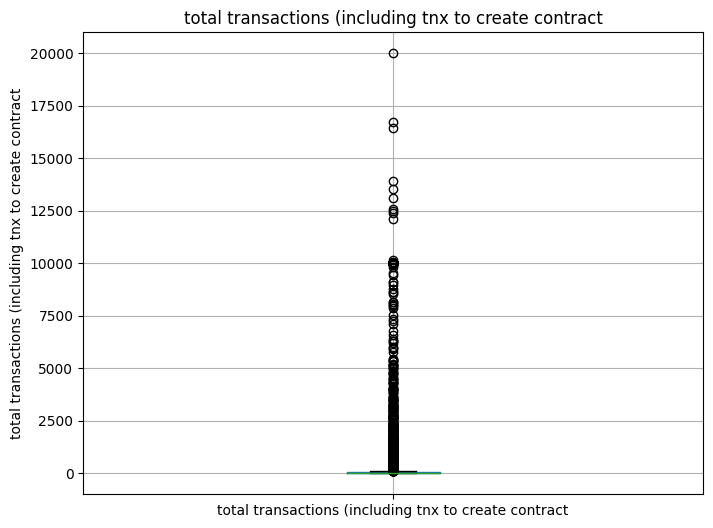

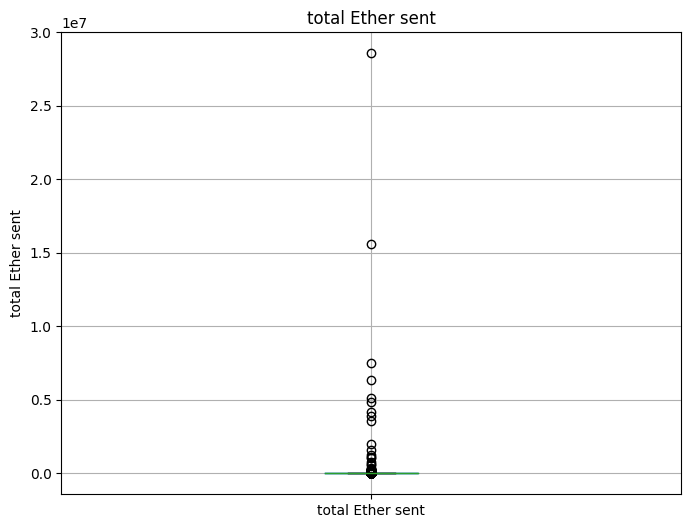

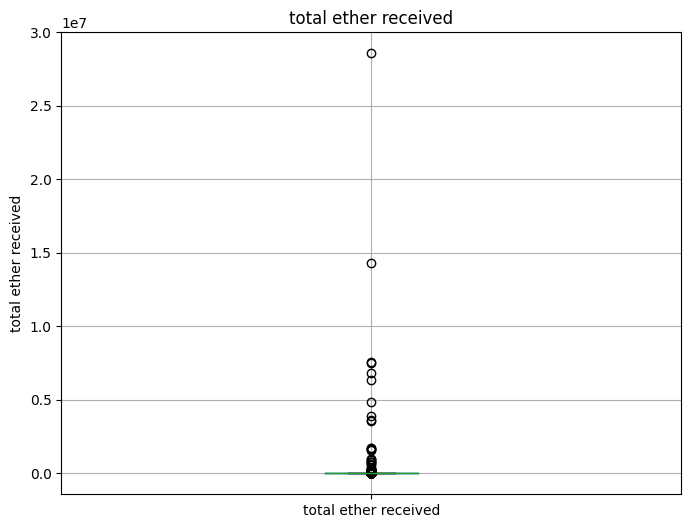

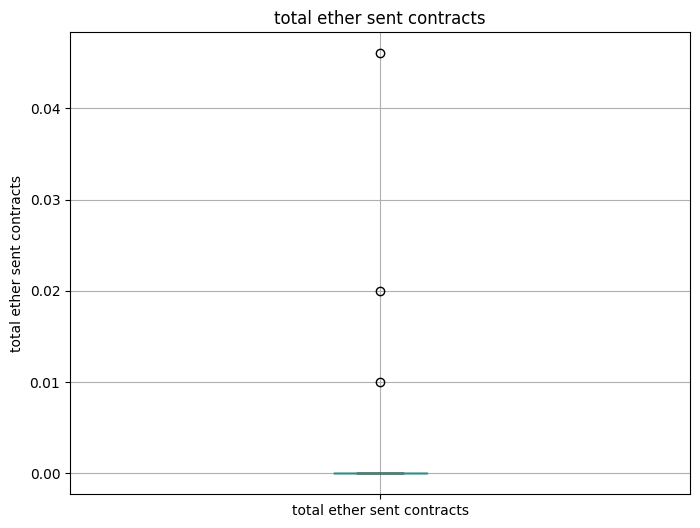

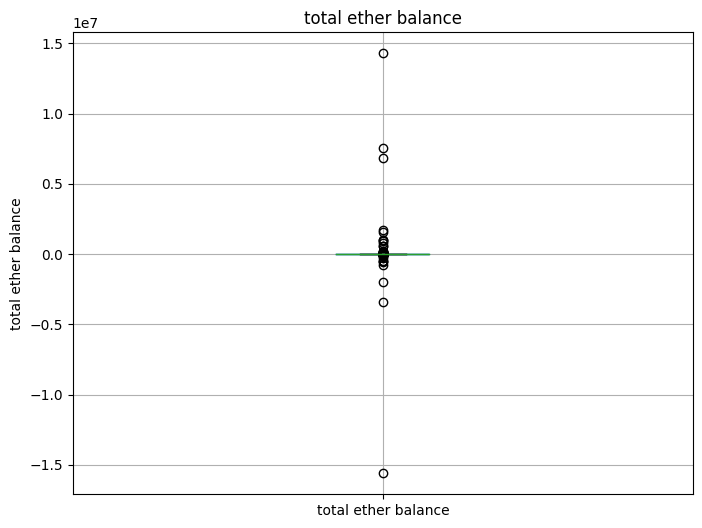

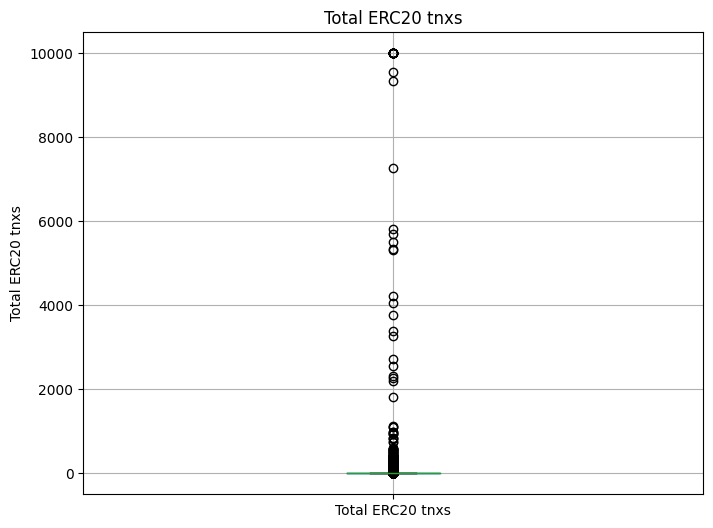

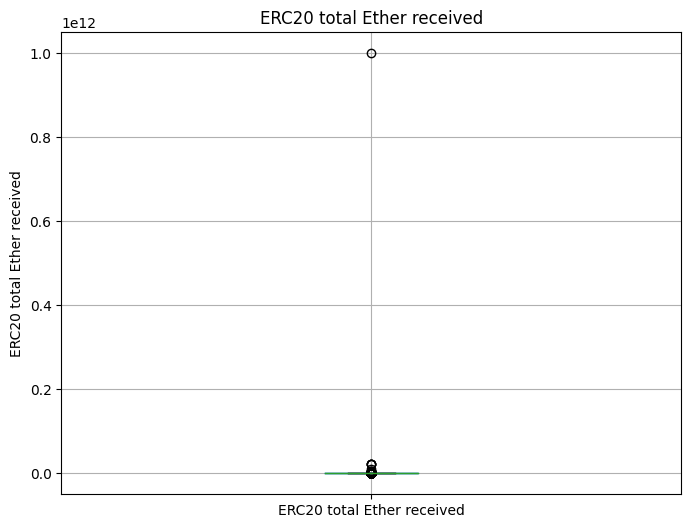

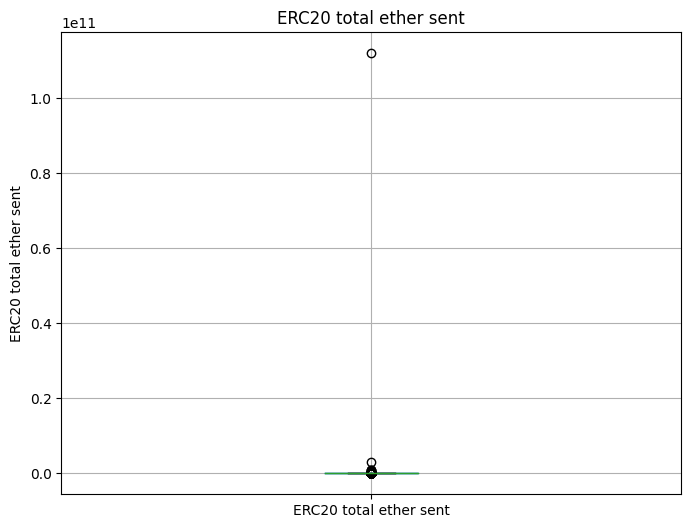

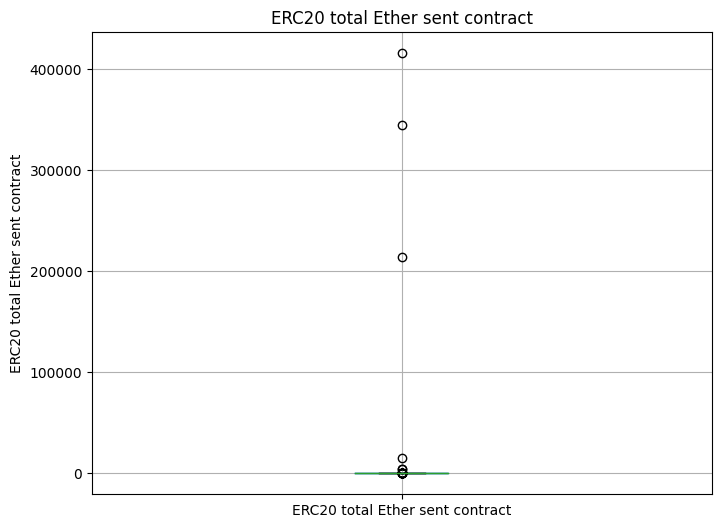

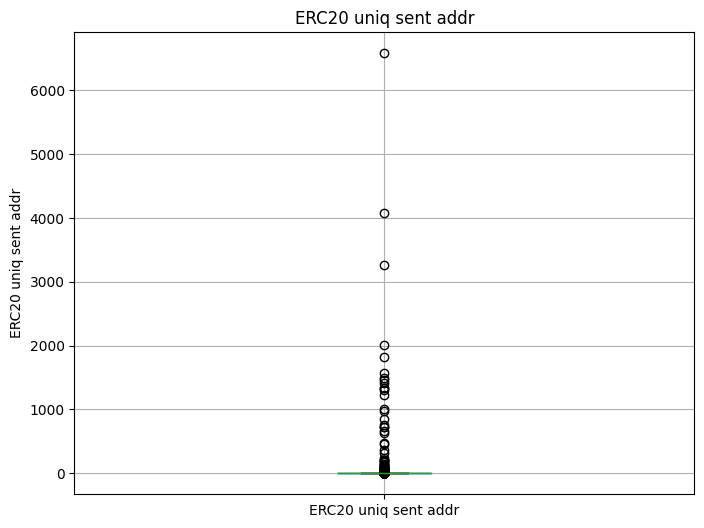

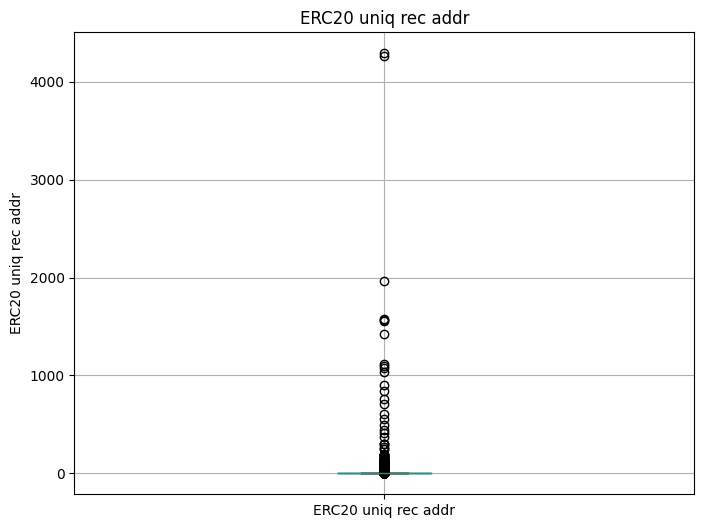

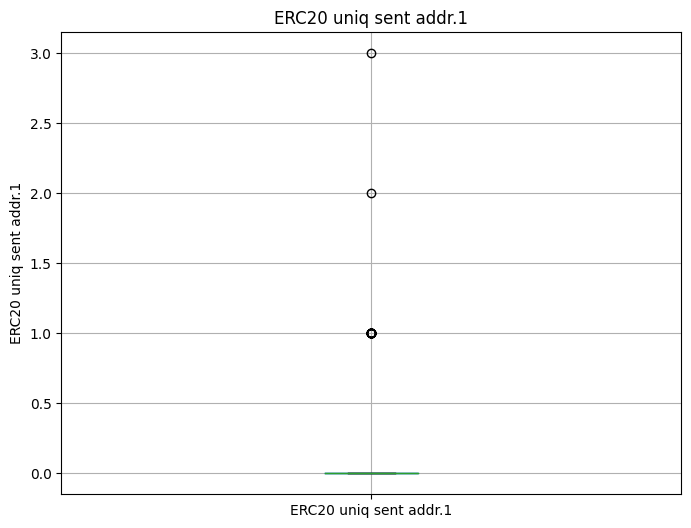

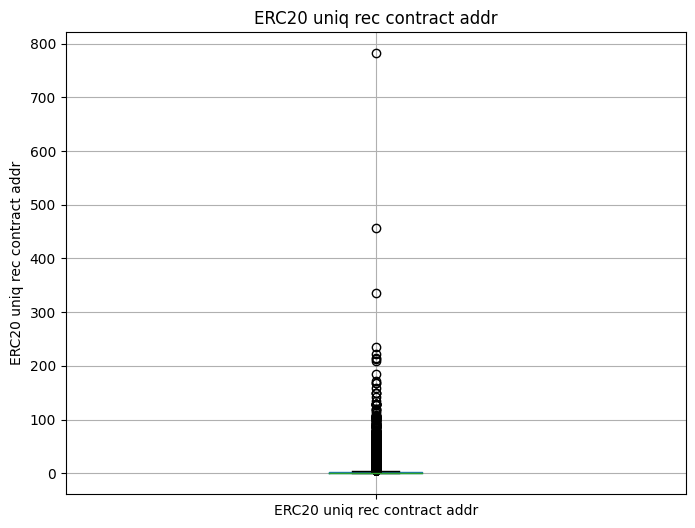

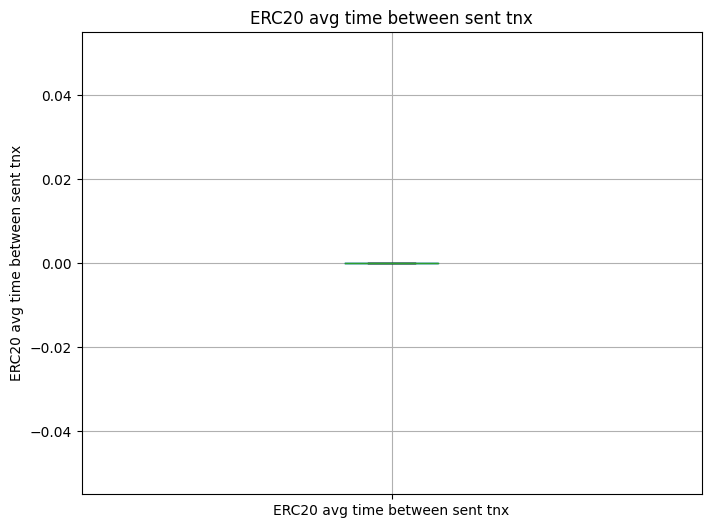

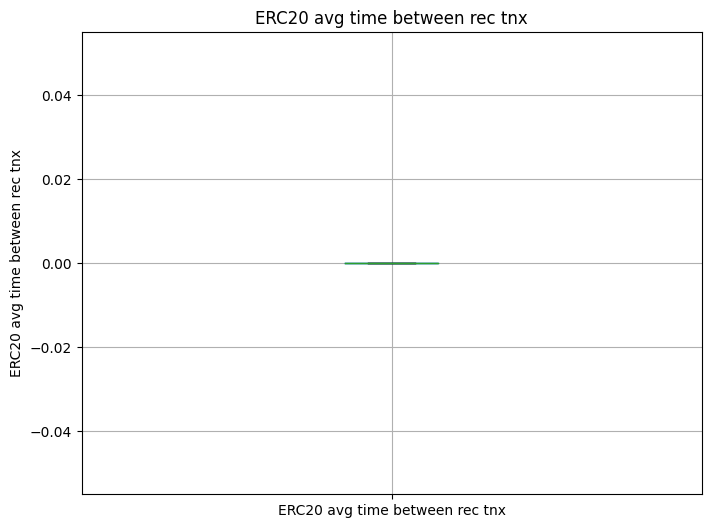

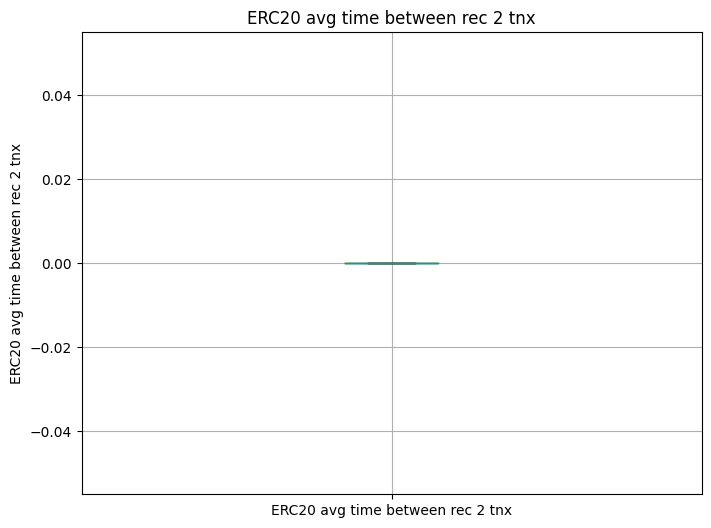

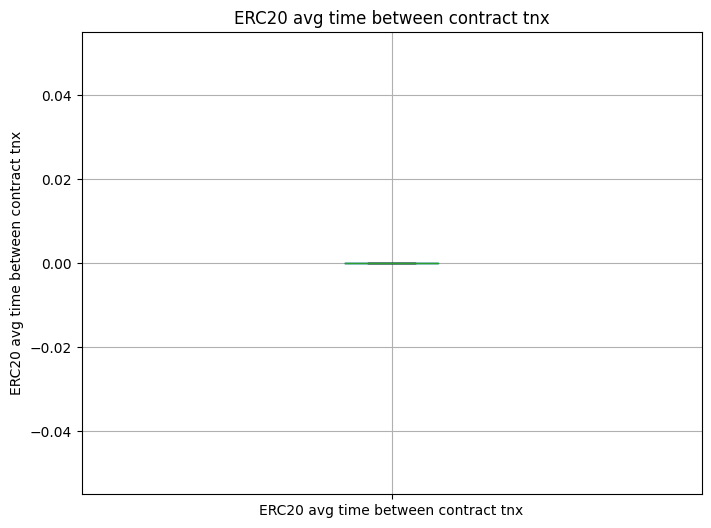

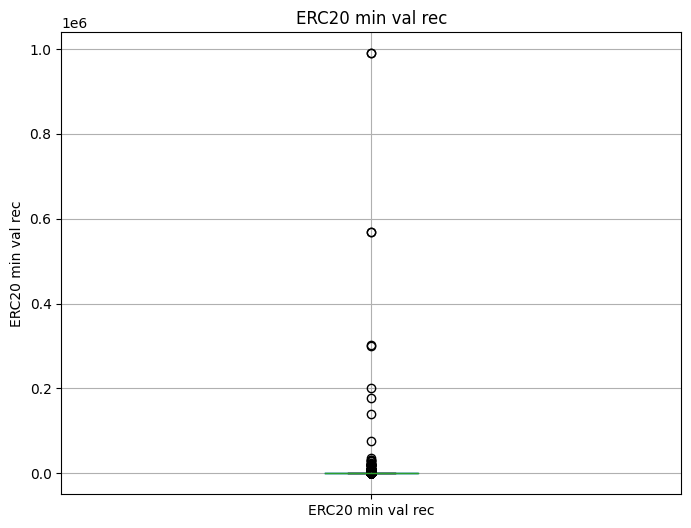

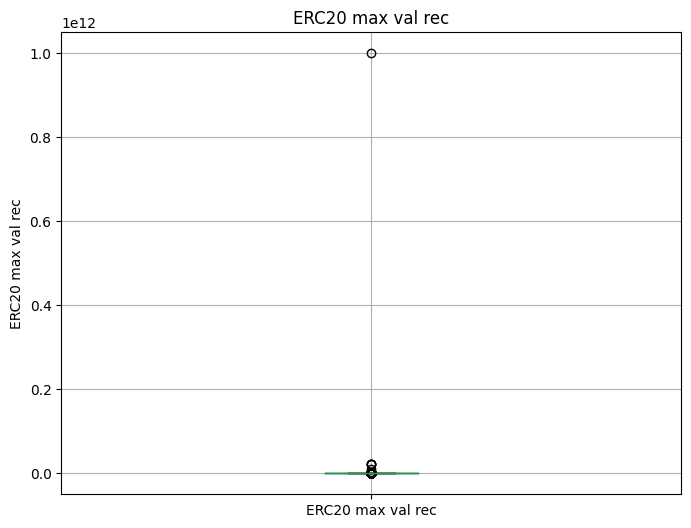

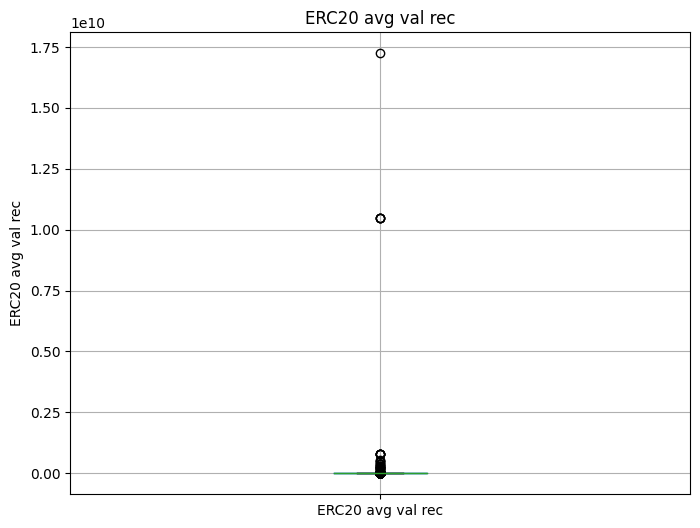

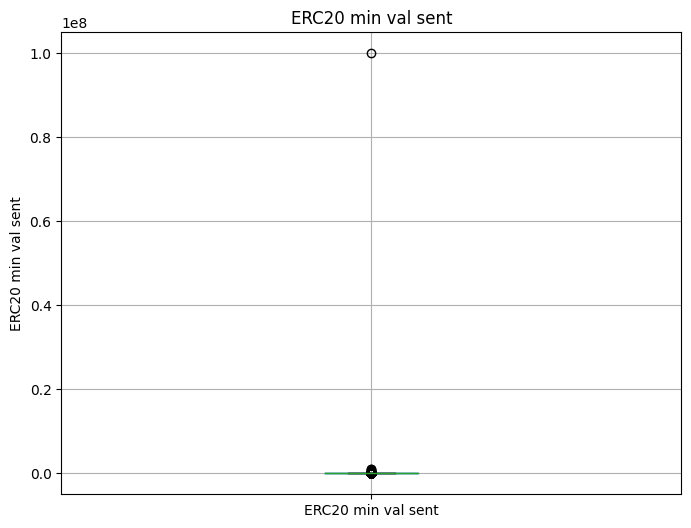

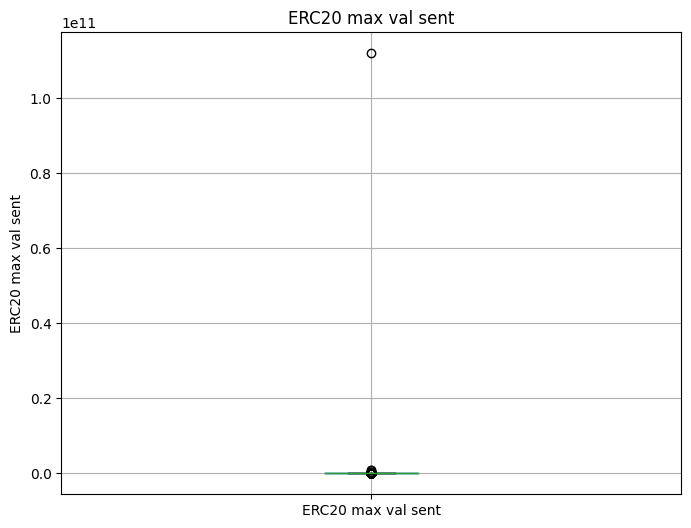

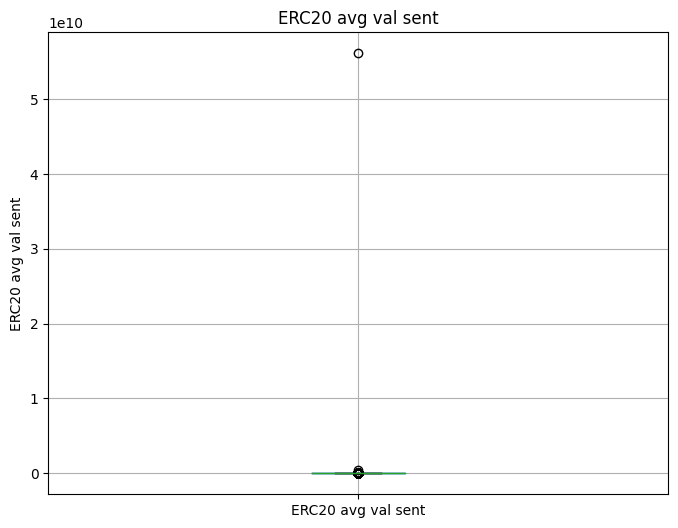

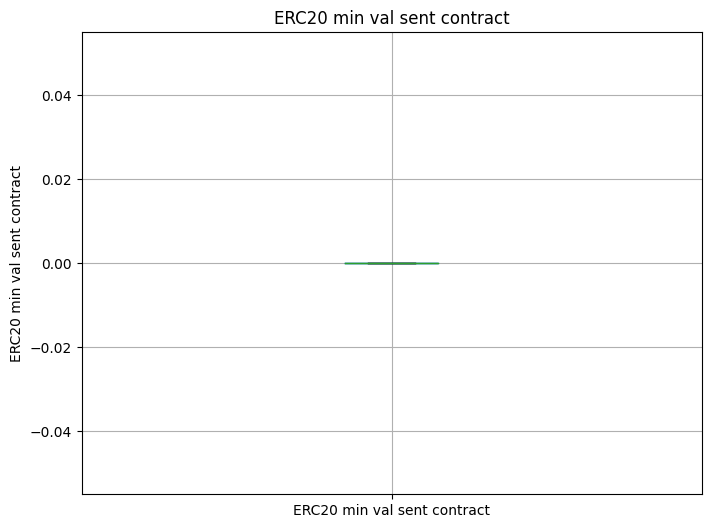

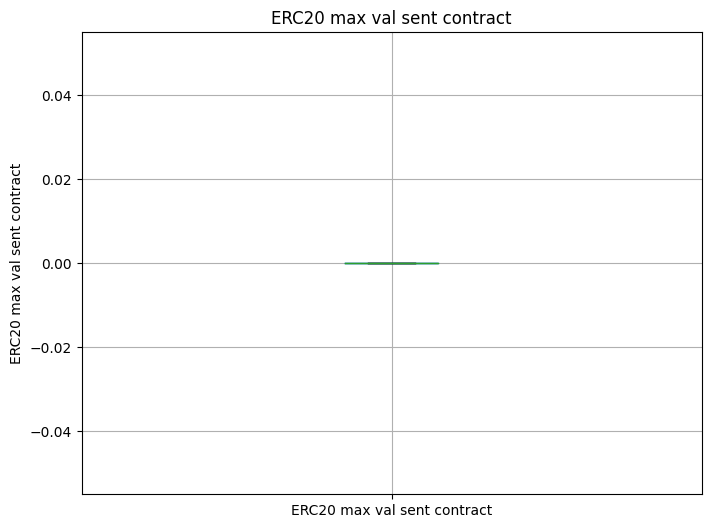

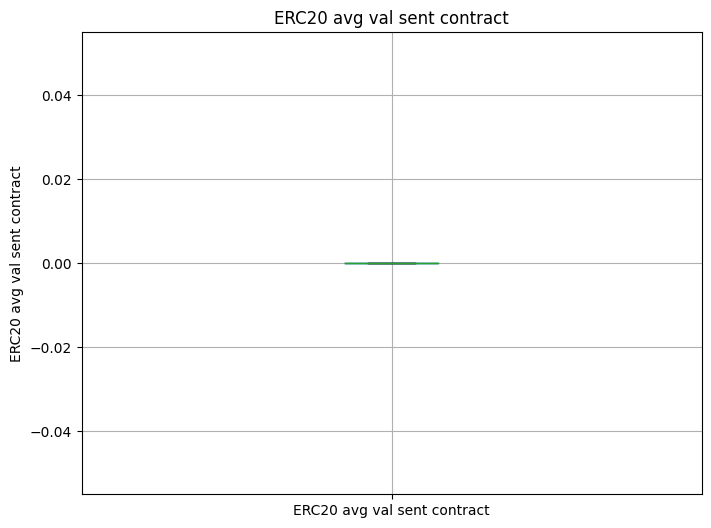

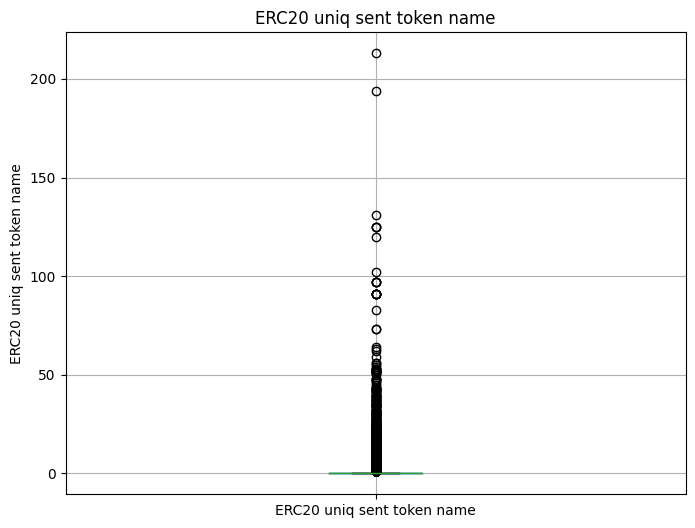

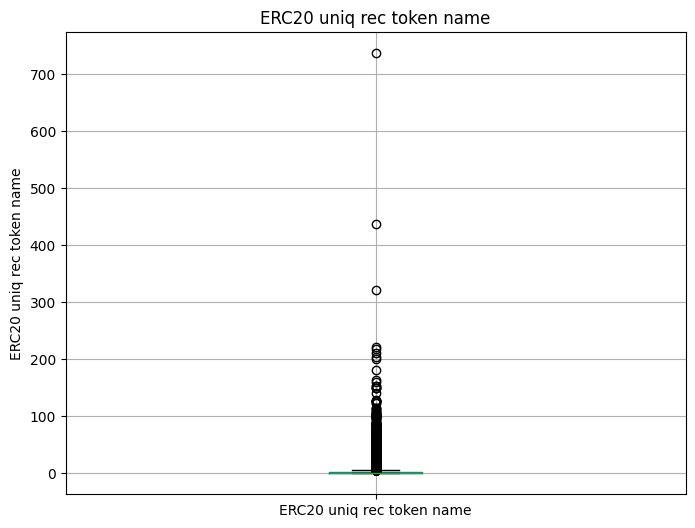

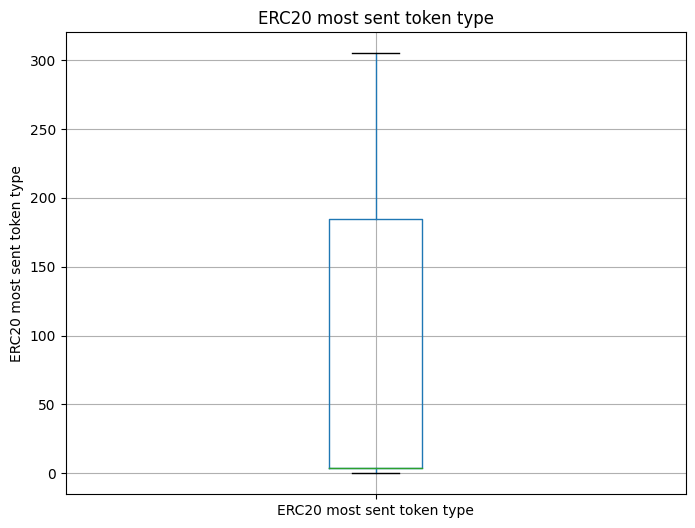

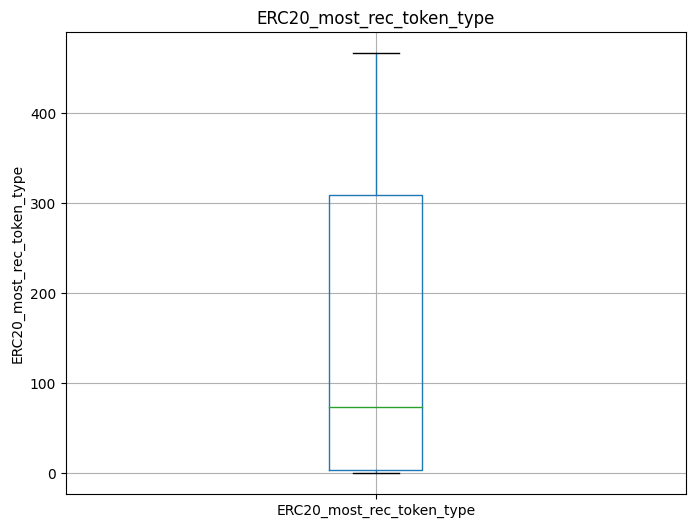

In [48]:
for column in df.columns:
  plt.figure(figsize=(8, 6))
  df.boxplot(column=column)
  plt.title(column)
  plt.ylabel(column)
  plt.show()

Usunięcie wartości odstających

In [36]:
print(column_list)

['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx', 'Number of Created Contracts', 'Unique Received From Addresses', 'Unique Sent To Addresses', 'min value received', 'max value received ', 'avg val received', 'min val sent', 'max val sent', 'avg val sent', 'min value sent to contract', 'max val sent to contract', 'avg value sent to contract', 'total transactions (including tnx to create contract', 'total Ether sent', 'total ether received', 'total ether sent contracts', 'total ether balance', 'Total ERC20 tnxs', 'ERC20 total Ether received', 'ERC20 total ether sent', 'ERC20 total Ether sent contract', 'ERC20 uniq sent addr', 'ERC20 uniq rec addr', 'ERC20 uniq sent addr.1', 'ERC20 uniq rec contract addr', 'ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx', 'ERC20 avg time between rec 2 tnx', 'ERC20 avg time between contract tnx', 'ERC20 min val rec', 'ERC20 max val rec', 'ERC20 avg 

In [71]:
number = len(df)
df_cleaned = df[df['Avg min between sent tnx'] <= 300000]
df_cleaned = df_cleaned[df_cleaned['Avg min between received tnx'] <= 300000]


df_cleaned = df_cleaned[df_cleaned['Unique Received From Addresses'] <= 6000]
df_cleaned = df_cleaned[df_cleaned['Unique Sent To Addresses'] <= 6000]
df_cleaned = df_cleaned[df_cleaned['max value received '] <= 300000]
df_cleaned = df_cleaned[df_cleaned['avg val received'] <= 250000]
df_cleaned = df_cleaned[df_cleaned['max val sent'] <= 100000]

df_cleaned = df_cleaned[df_cleaned['min val sent'] <= 2000]
df_cleaned = df_cleaned[df_cleaned['avg val sent'] <= 6000]
df_cleaned = df_cleaned[df_cleaned['total transactions (including tnx to create contract'] < 20000]


df_cleaned = df_cleaned[df_cleaned['ERC20 uniq sent addr'] <= 3000]
df_cleaned = df_cleaned[df_cleaned['ERC20 uniq rec addr'] <= 2000]
df_cleaned = df_cleaned[df_cleaned['ERC20 uniq rec contract addr'] <= 300]

df_cleaned = df_cleaned[df_cleaned['ERC20 uniq sent token name'] <= 150]
df_cleaned = df_cleaned[df_cleaned['ERC20 uniq rec token name'] <= 300]
number2 = len(df_cleaned)
print(number-number2)

35


In [72]:
df_cleaned

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,63,300
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,154,257
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,185,436
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,217,436
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,238,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,1,194
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,1,74
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,1,185
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,5.0,304,464


Standaryzacja

In [78]:
col_float = df.select_dtypes(include='float').columns.tolist()

scaler = MinMaxScaler()

for i in df_cleaned[col_float]:
  df_cleaned[i] = scaler.fit_transform(df_cleaned[[i]])

df_cleaned.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,0.002820,0.003676,0.360530,721,89,0,40,118,0.000000,...,0.000000e+00,1.502768e-04,4.840458e-06,0.0,0.0,0.0,0.297710,0.261468,63,300
1,0,0.042458,0.009943,0.623173,94,8,0,5,14,0.000000,...,2.260809e-08,2.018579e-11,4.026549e-11,0.0,0.0,0.0,0.007634,0.032110,154,257
2,0,0.822474,0.008181,0.264330,2,10,0,10,2,0.000011,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.036697,185,436
3,0,0.034141,0.053054,0.203368,25,9,0,7,13,0.000000,...,1.000000e-06,8.061813e-08,6.775142e-08,0.0,0.0,0.0,0.007634,0.050459,217,436
4,0,0.000122,0.035989,0.195652,4598,20,1,7,19,0.000000,...,0.000000e+00,4.017857e-07,2.444747e-07,0.0,0.0,0.0,0.045802,0.123853,238,154


Pokaż pary zmiennych, które mają najwyższą korelację


In [81]:
corr_matrix = df_cleaned.corr()

# Wybierz pary zmiennych, które mają korelację powyżej 0.9
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Wyświetl pary zmiennych z korelacją powyżej 0.9
print("Pary zmiennych z korelacją powyżej 0.9:")
for pair in high_corr_pairs:
    print(pair)

Pary zmiennych z korelacją powyżej 0.9:
('max val sent to contract', 'avg value sent to contract', 0.9496068129725375)
('max val sent to contract', 'total ether sent contracts', 0.9999999999969915)
('avg value sent to contract', 'total ether sent contracts', 0.9496075811863032)
('total Ether sent', 'total ether received', 0.9472146119658191)
('ERC20 total Ether received', 'ERC20 max val rec', 0.999973155732246)
('ERC20 total ether sent', 'ERC20 min val sent', 0.999311386727291)
('ERC20 total ether sent', 'ERC20 max val sent', 0.9996514775696231)
('ERC20 total ether sent', 'ERC20 avg val sent', 0.999567329518364)
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name', 0.9996599604075405)
('ERC20 min val sent', 'ERC20 max val sent', 0.9997275088029944)
('ERC20 min val sent', 'ERC20 avg val sent', 0.9997848425158199)
('ERC20 max val sent', 'ERC20 avg val sent', 0.9999507862530158)


In [82]:
columns_to_drop = ['total ether sent contracts', 'ERC20 total ether sent', 'ERC20 min val sent', 'ERC20 avg val sent']

df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [83]:
corr_matrix = df_cleaned.corr()

# Wybierz pary zmiennych, które mają korelację powyżej 0.9
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Wyświetl pary zmiennych z korelacją powyżej 0.9
print("Pary zmiennych z korelacją powyżej 0.9:")
for pair in high_corr_pairs:
    print(pair)

Pary zmiennych z korelacją powyżej 0.9:
('max val sent to contract', 'avg value sent to contract', 0.9496068129725375)
('total Ether sent', 'total ether received', 0.9472146119658191)
('ERC20 total Ether received', 'ERC20 max val rec', 0.999973155732246)
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name', 0.9996599604075405)


Wyświetlenie korelacji ze zmienną flag, żeby podjąć decyzję, którą zmienną usunąć

In [84]:
corr_columns = ['max val sent to contract', 'avg value sent to contract', 'total Ether sent',
                'total ether received', 'ERC20 total Ether received', 'ERC20 max val rec', 'ERC20 uniq rec contract addr', 'ERC20 uniq rec token name']

for column in corr_columns:
  correlation_with_flag = df_cleaned[[column, 'FLAG']].corr().iloc[0, 1]

  # Wyświetl korelację
  print(f"Korelacja między {column} a FLAG: {correlation_with_flag}")

Korelacja między max val sent to contract a FLAG: -0.008015624003339708
Korelacja między avg value sent to contract a FLAG: -0.008913677176488229
Korelacja między total Ether sent a FLAG: -0.012340320857024684
Korelacja między total ether received a FLAG: -0.014698336626334303
Korelacja między ERC20 total Ether received a FLAG: -0.00448438677204014
Korelacja między ERC20 max val rec a FLAG: -0.004314021864958462
Korelacja między ERC20 uniq rec contract addr a FLAG: -0.017675810488838546
Korelacja między ERC20 uniq rec token name a FLAG: -0.016865854894891695


In [85]:
columns_to_drop = ['avg value sent to contract', 'total Ether sent', 'ERC20 max val rec',
                   'ERC20 uniq rec token name']

df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [86]:
df_cleaned.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 avg val rec,ERC20 max val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,0.002820,0.003676,0.360530,721,89,0,40,118,0.000000,...,0.0,0.0,1.540361e-05,1.502768e-04,0.0,0.0,0.0,0.297710,63,300
1,0,0.042458,0.009943,0.623173,94,8,0,5,14,0.000000,...,0.0,0.0,3.342608e-09,2.018579e-11,0.0,0.0,0.0,0.007634,154,257
2,0,0.822474,0.008181,0.264330,2,10,0,10,2,0.000011,...,0.0,0.0,3.780868e-09,0.000000e+00,0.0,0.0,0.0,0.000000,185,436
3,0,0.034141,0.053054,0.203368,25,9,0,7,13,0.000000,...,0.0,0.0,9.021965e-08,8.061813e-08,0.0,0.0,0.0,0.007634,217,436
4,0,0.000122,0.035989,0.195652,4598,20,1,7,19,0.000000,...,0.0,0.0,2.861783e-07,4.017857e-07,0.0,0.0,0.0,0.045802,238,154


Analiza PCA

In [100]:
#oddzielenie kolumn X od y
X = df_cleaned.drop('FLAG', axis=1)
y = df_cleaned['FLAG']

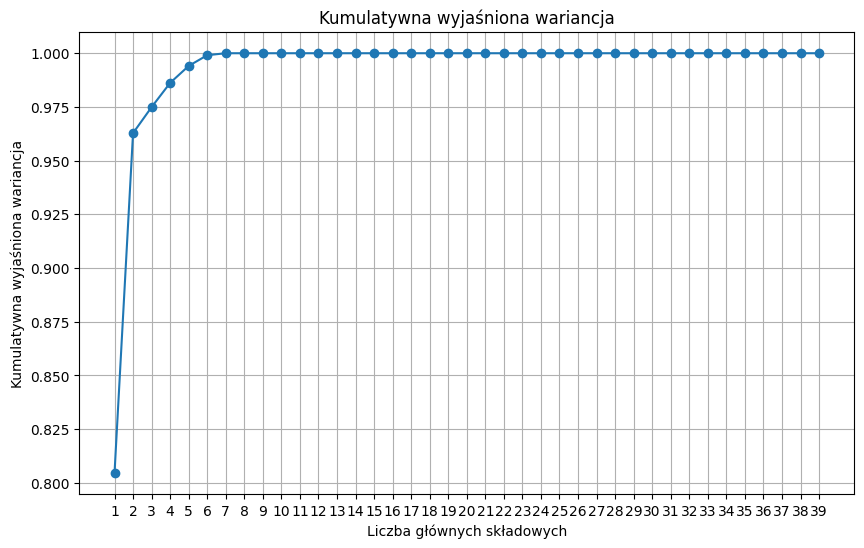

In [101]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Rysowanie wykresu kumulatywnej wyjaśnionej wariancji
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Kumulatywna wyjaśniona wariancja')
plt.xlabel('Liczba głównych składowych')
plt.ylabel('Kumulatywna wyjaśniona wariancja')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))
plt.grid(True)
plt.show()



# data_pca = pca.transform(df_cleaned)



Po przeprowadzeniu PCA i analizie wykresu chcę zastosować 7 wymiarów

In [105]:
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X)

X_df_pca = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, X_pca.shape[1] + 1)])
X_df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,610.343727,561.453206,-111.236826,-21.656090,16.737439,-57.741592,-103.044487
1,-205.500629,68.077707,-131.240700,-12.608242,10.473346,-3.014458,-0.149909
2,-303.923809,-12.920473,-300.496325,-33.342376,21.716798,9.218443,-64.475240
3,-278.680661,8.742595,-316.550398,-37.140521,15.993692,10.898500,-37.020581
4,4847.824701,3840.133954,-63.811000,524.792999,359.233170,-722.510254,99.770356


# **Klasyfikatory**

Sprawdzenie poziomu niezbalansowania

In [110]:
df_counts = df_cleaned.groupby('FLAG').count()
df_counts


,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 avg val rec,ERC20 max val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 most sent token type,ERC20_most_rec_token_type
FLAG,,,,,,,,,,,,,,,,,,,,,
0,7629,7629,7629,7629,7629,7629,7629,7629,7629,7629,...,7629,7629,7629,7629,7629,7629,7629,7629,7629,7629
1,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177,...,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177


Dzielenie na zbiór treningowy i testowy

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, random_state=42, stratify=y)

Zdefiniowanie SMOTE i RandomUnderSampler dla wszystkich klasyfikatorów

In [148]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=1.0)

## Regresja logistyczna

In [149]:
logistic_model = LogisticRegression()

Zastosowanie pipeline do zbalansowania danych

In [150]:
logistic_pipeline = make_pipeline(over, under, logistic_model)

In [151]:
logistic_pipeline.fit(X_train, y_train)
y_pred=logistic_pipeline.predict(X_test)

logistics_accuracy = accuracy_score(y_test, y_pred)
logistics_recall = recall_score(y_test, y_pred)
print(logistics_accuracy)
print(logistics_recall)


0.8637206427688504
0.9387186629526463


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## KNN

In [152]:
knn_model = KNeighborsClassifier(n_neighbors=3)

Zastosowanie pipeline do zbalansowania danych

In [153]:
knn_pipeline = make_pipeline(over, under, knn_model)

In [154]:
knn_pipeline.fit(X_train, y_train)
y_pred=knn_pipeline.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
print(knn_accuracy)
print(knn_recall)


0.9755871446229913
0.958217270194986


## Maszyna wektorów nośnych

In [159]:
svc_model = SVC()

Zastosowanie pipeline do zbalansowania danych

In [160]:
svc_pipeline = make_pipeline(over, under, svc_model)

In [161]:
svc_pipeline.fit(X_train, y_train)
y_pred=svc_pipeline.predict(X_test)

svc_accuracy = accuracy_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
print(svc_accuracy)
print(svc_recall)

0.8479604449938195
0.8760445682451253


## Wyniki

In [162]:
data = {
    'Model': ['Regresja logistyczna', 'KNN', 'SVC'],
    'Accuracy': [logistics_accuracy, knn_accuracy, svc_accuracy],
    'Recall': [logistics_recall, knn_recall, svc_recall]
}

# Utworzenie obiektu DataFrame
df_results = pd.DataFrame(data)

# Wyświetlenie tabeli
print(df_results)

                  Model  Accuracy    Recall
0  Regresja logistyczna  0.863721  0.938719
1                   KNN  0.975587  0.958217
2                   SVC  0.847960  0.876045


# Wniosek
Najlepszym modelem okazał się być model K-najbliższych sąsiadów po zastosowaniu zarówno over i under samplingu. Model nie tylko uzyskał najwyższe accuracy, ale co ważniejsze najwyższy recall. Zależało mi na uzyskaniu jak najwyższego recall, na którym zależy nam szczególnie w przypadku wykrywania oszustw, ponieważ skupia się on na zdolności modelu do wykrywania wszystkich pozytywnych przypadków (czyli faktycznych oszustw) spośród wszystkich rzeczywiście pozytywnych przypadków (suma oszustw wykrytych oraz tych niewykrytych). W kontekście wykrywania oszustw rzeczywiście pozytywnymi przypadkami są oszustwa, które chcemy jak najskuteczniej wykryć.